# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [1]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [2]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [3]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
5431,Chinatown,1974,Noah Cross,man,1096,0.093731,68.0,NaN,1999
22958,Wish I Was Here,2014,Mrs Luis,woman,128,0.009183,NaN,3.0,9230
20324,Gangster Squad,2013,Jack Whalen,man,429,0.045325,36.0,49.0,7849
4878,Blue Velvet,1986,Jeffrey Beaumon,man,8594,0.417184,27.0,20.0,1866
5974,Despicable Me 2,2013,Lucy,woman,1101,0.178213,40.0,393.0,2148
8963,Mission: Impossible II,2000,Hugh Stamp,man,404,0.019457,38.0,347.0,2935
3982,American Pie,1999,Chris 'Oz' Ostr,man,2566,0.146998,20.0,174.0,1635
11454,Wall Street,1987,Lou Mannheim,man,634,0.021325,62.0,97.0,3673
21359,Psycho II,1983,Kim,woman,113,0.011487,NaN,88.0,8268
4760,Blade,1998,Karen,woman,2782,0.194437,28.0,129.0,1843


Generate information about all the columns in the data 

In [4]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

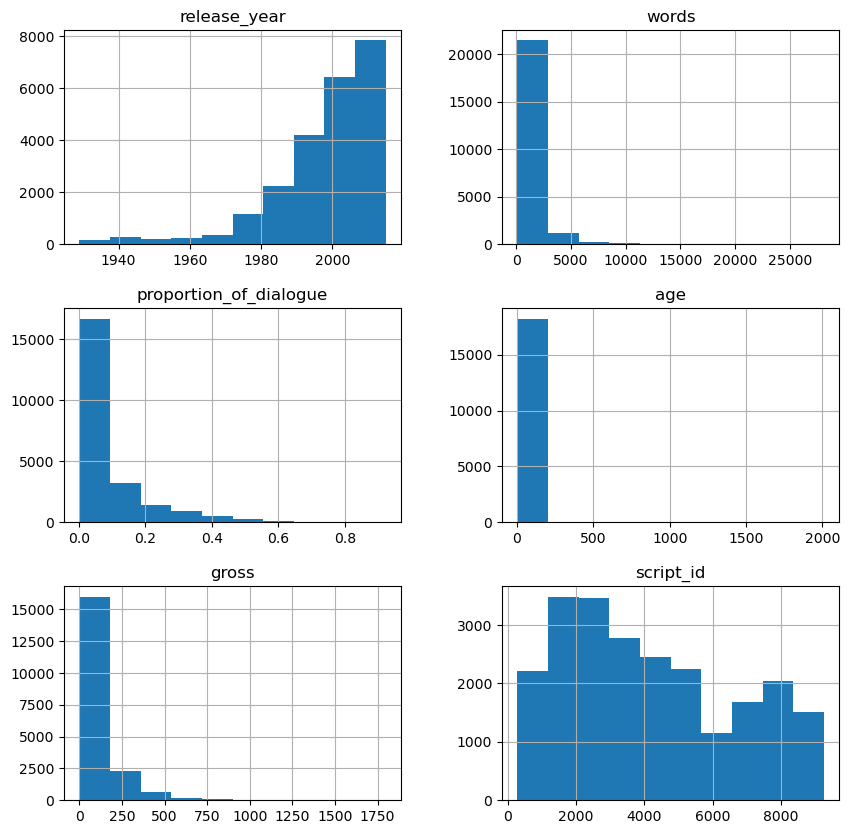

In [5]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [6]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

ENTER YOUR RESPONSE

In [ ]:
Patters I can see from this data set are the words, prop of dialouge, age, gross and script ID of the unique and top sets are all NaN, an outlier I noticed was 1994's character 17543 

In [7]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [8]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [10]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [11]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [12]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [13]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [36]:
film_df[film_df['title'] == "The Wolf of Wall Street"]

  

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
11631,The Wolf of Wall Street,2013,Alden Kupferber,man,123,0.007171,NaN,125.0,3737
11632,The Wolf of Wall Street,2013,Brad,man,199,0.011602,36.0,125.0,3737
11633,The Wolf of Wall Street,2013,Captain Ted Bee,man,150,0.008745,44.0,125.0,3737
11634,The Wolf of Wall Street,2013,Donnie Azoff,man,1412,0.082323,30.0,125.0,3737
11635,The Wolf of Wall Street,2013,Dwayne,man,114,0.006646,44.0,125.0,3737
11636,The Wolf of Wall Street,2013,Jean Jacques Sa,man,375,0.021863,41.0,125.0,3737
11637,The Wolf of Wall Street,2013,Jerry Fogel,man,116,0.006763,NaN,125.0,3737
11638,The Wolf of Wall Street,2013,Jordan Belfort,man,11718,0.683186,39.0,125.0,3737
11639,The Wolf of Wall Street,2013,Manny Riskin,man,168,0.009795,47.0,125.0,3737
11640,The Wolf of Wall Street,2013,Mark Hanna,man,422,0.024604,44.0,125.0,3737


If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [37]:

film_df[film_df['title'] == "The Wolf of Wall Street"].sort_values(by='words', ascending=False)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
11638,The Wolf of Wall Street,2013,Jordan Belfort,man,11718,0.683186,39.0,125.0,3737
11634,The Wolf of Wall Street,2013,Donnie Azoff,man,1412,0.082323,30.0,125.0,3737
11642,The Wolf of Wall Street,2013,Naomi Lapaglia,woman,1281,0.074685,23.0,125.0,3737
11640,The Wolf of Wall Street,2013,Mark Hanna,man,422,0.024604,44.0,125.0,3737
11636,The Wolf of Wall Street,2013,Jean Jacques Sa,man,375,0.021863,41.0,125.0,3737
11641,The Wolf of Wall Street,2013,Max Belfort,man,274,0.015975,66.0,125.0,3737
11643,The Wolf of Wall Street,2013,Nicky Koskoff (,man,257,0.014984,39.0,125.0,3737
11644,The Wolf of Wall Street,2013,Steve Madden,man,203,0.011835,32.0,125.0,3737
11632,The Wolf of Wall Street,2013,Brad,man,199,0.011602,36.0,125.0,3737
11639,The Wolf of Wall Street,2013,Manny Riskin,man,168,0.009795,47.0,125.0,3737


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [38]:
film_df[film_df["character"] == "Jordan Belfort"]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
11638,The Wolf of Wall Street,2013,Jordan Belfort,man,11718,0.683186,39.0,125.0,3737


In [40]:
film_df[film_df["character"] == "Mark Hanna"]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
11640,The Wolf of Wall Street,2013,Mark Hanna,man,422,0.024604,44.0,125.0,3737


### ❓ How does this data align with your experience/knowledge of the film?

This data alligns perfeclty with what I know about Jordan Belfort, hes the main character so he'd have the most words, it was released in 2013, and he's 39 in the movie. 

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

These specifc examples help me understand the process of data collection more, it doesnt seem easy but the amount of information and sometimes the little effort thats needed is amazing. 

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [44]:
film_df[film_df['title'] == "The Wolf of Wall Street"].sort_values(by='proportion_of_dialogue' , ascending=False)



,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
11638,The Wolf of Wall Street,2013,Jordan Belfort,man,11718,0.683186,39.0,125.0,3737
11634,The Wolf of Wall Street,2013,Donnie Azoff,man,1412,0.082323,30.0,125.0,3737
11642,The Wolf of Wall Street,2013,Naomi Lapaglia,woman,1281,0.074685,23.0,125.0,3737
11640,The Wolf of Wall Street,2013,Mark Hanna,man,422,0.024604,44.0,125.0,3737
11636,The Wolf of Wall Street,2013,Jean Jacques Sa,man,375,0.021863,41.0,125.0,3737
11641,The Wolf of Wall Street,2013,Max Belfort,man,274,0.015975,66.0,125.0,3737
11643,The Wolf of Wall Street,2013,Nicky Koskoff (,man,257,0.014984,39.0,125.0,3737
11644,The Wolf of Wall Street,2013,Steve Madden,man,203,0.011835,32.0,125.0,3737
11632,The Wolf of Wall Street,2013,Brad,man,199,0.011602,36.0,125.0,3737
11639,The Wolf of Wall Street,2013,Manny Riskin,man,168,0.009795,47.0,125.0,3737


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [45]:
film_df[film_df['title'] == "The Wolf of Wall Street"].sort_values(by="proportion_of_dialogue" , ascending=True)


,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
11635,The Wolf of Wall Street,2013,Dwayne,man,114,0.006646,44.0,125.0,3737
11637,The Wolf of Wall Street,2013,Jerry Fogel,man,116,0.006763,NaN,125.0,3737
11631,The Wolf of Wall Street,2013,Alden Kupferber,man,123,0.007171,NaN,125.0,3737
11633,The Wolf of Wall Street,2013,Captain Ted Bee,man,150,0.008745,44.0,125.0,3737
11645,The Wolf of Wall Street,2013,Teresa Petrillo,woman,150,0.008745,28.0,125.0,3737
11639,The Wolf of Wall Street,2013,Manny Riskin,man,168,0.009795,47.0,125.0,3737
11632,The Wolf of Wall Street,2013,Brad,man,199,0.011602,36.0,125.0,3737
11644,The Wolf of Wall Street,2013,Steve Madden,man,203,0.011835,32.0,125.0,3737
11643,The Wolf of Wall Street,2013,Nicky Koskoff (,man,257,0.014984,39.0,125.0,3737
11641,The Wolf of Wall Street,2013,Max Belfort,man,274,0.015975,66.0,125.0,3737


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [55]:
film_df[film_df['title'] == 'The Wolf of Wall Street'].sort_values(by='proportion_of_dialogue')


,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
11635,The Wolf of Wall Street,2013,Dwayne,man,114,0.006646,44.0,125.0,3737
11637,The Wolf of Wall Street,2013,Jerry Fogel,man,116,0.006763,NaN,125.0,3737
11631,The Wolf of Wall Street,2013,Alden Kupferber,man,123,0.007171,NaN,125.0,3737
11633,The Wolf of Wall Street,2013,Captain Ted Bee,man,150,0.008745,44.0,125.0,3737
11645,The Wolf of Wall Street,2013,Teresa Petrillo,woman,150,0.008745,28.0,125.0,3737
11639,The Wolf of Wall Street,2013,Manny Riskin,man,168,0.009795,47.0,125.0,3737
11632,The Wolf of Wall Street,2013,Brad,man,199,0.011602,36.0,125.0,3737
11644,The Wolf of Wall Street,2013,Steve Madden,man,203,0.011835,32.0,125.0,3737
11643,The Wolf of Wall Street,2013,Nicky Koskoff (,man,257,0.014984,39.0,125.0,3737
11641,The Wolf of Wall Street,2013,Max Belfort,man,274,0.015975,66.0,125.0,3737


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

Patterns I noticed throughout this data set were the main characters obviously had the most amount of dialogue spoken, while the ones I didnt really know that well, were the ones with the least spoken, mostly being side characters

## Groupby

Group by film and then calculate the sum total for every column.

In [67]:
film_df.groupby('title').sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1414a8fd0>>

Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [66]:
film_df.groupby('title').count()['words'].sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of title
(500) Days of Summer          13
10 Things I Hate About You    12
12 Years a Slave              28
12 and Holding                15
127 Hours                      4
                              ..
Zero Effect                    7
Zerophilia                     8
Zodiac                        31
eXistenZ                       9
xXx                            9
Name: words, Length: 1994, dtype: int64>

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [68]:
film_df.groupby('title') ['gender'].count().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of title
(500) Days of Summer          13
10 Things I Hate About You    12
12 Years a Slave              28
12 and Holding                15
127 Hours                      4
                              ..
Zero Effect                    7
Zerophilia                     8
Zodiac                        31
eXistenZ                       9
xXx                            9
Name: gender, Length: 1994, dtype: int64>

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [69]:
women_filter = film_df['gender'] == 'woman'

In [70]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [71]:
men_filter = film_df['gender'] == 'man'

In [72]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [10]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [76]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [74]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [77]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [78]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [79]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
The Departed              24518
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

Some patterns I noticed were movies that have more action genre type names, or horror names tend to have the most men played, while other romantic, but some action genre films have more women than men. 

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<Axes: title={'center': ' Top 20 Women within Movies'}, xlabel='title'>

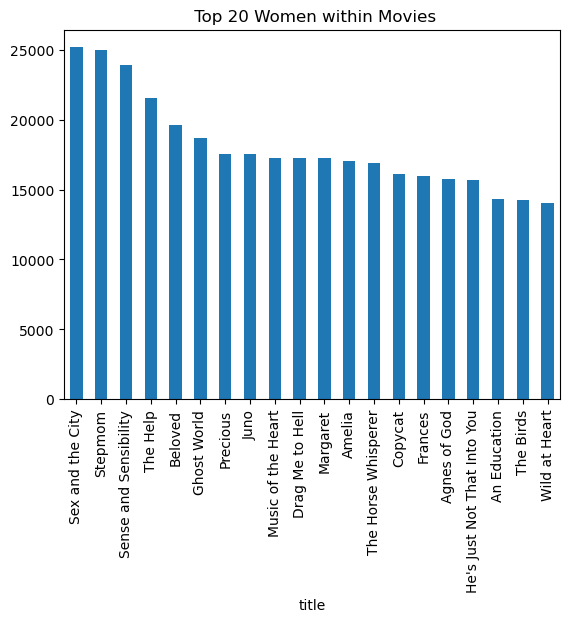

In [81]:
top20_women.plot(
    kind='bar',
    title= ' Top 20 Women within Movies'
    
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

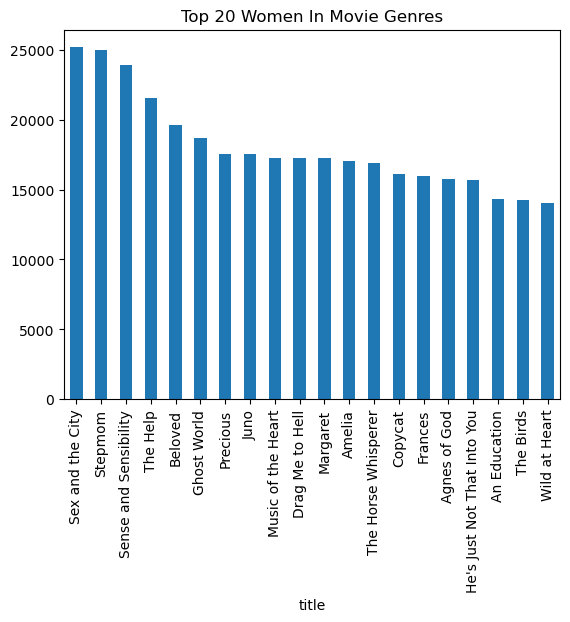

In [82]:
ax = top20_women.plot(
    kind='bar',
    title = 'Top 20 Women In Movie Genres'
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

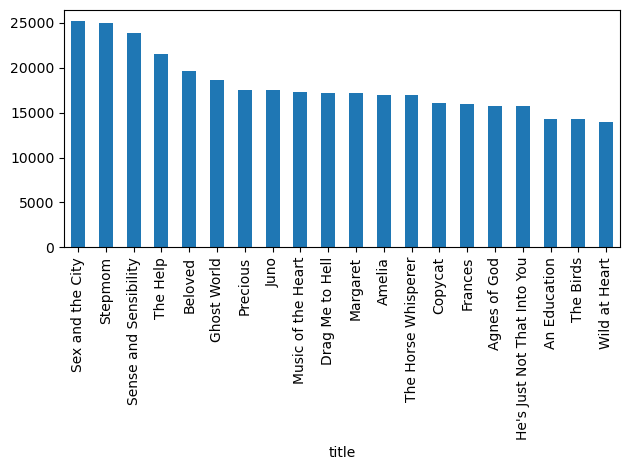

In [83]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [85]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [86]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [87]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

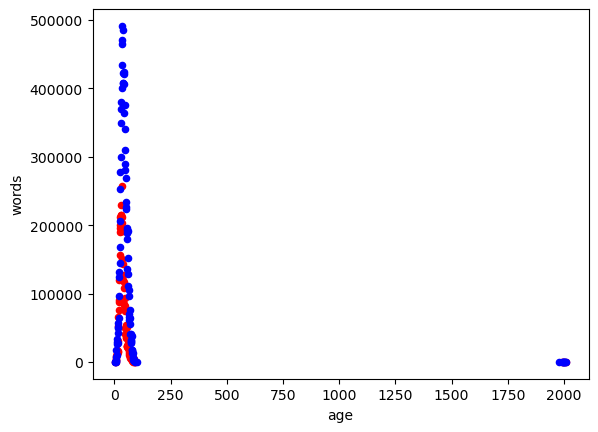

In [88]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

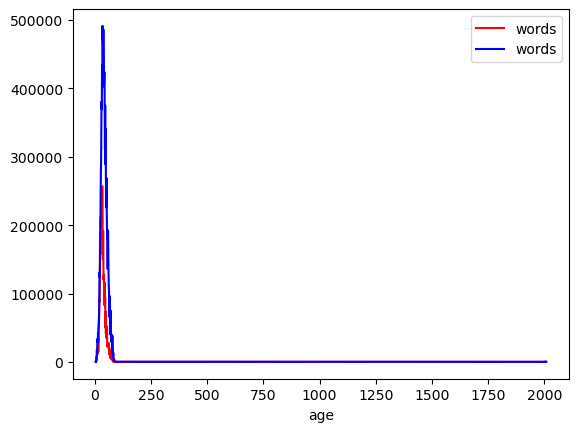

In [89]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

My first impressions of EDA techniques were, I had a little trouble fully grasping the ideas and processes at first, but I started to gradually understand more and more, the exercises and midterm that were completed helped a lot more, and I can confidently say now that although Im not a pro, I do have a tiny understanding of these techniques. Overall I enjoyed learning and practicing throughout our panda data analysis. Im not a computer science major, so entering this class and coming freshly new into coding as well as everything that was discussed in class was a pretty big hurdle for me, but i think I tackled them and adapted to whatever I was dealing with. The help forum aided in this as well, the people in this class are incredibly nice and helpful, although I was scared at first to ask questions because I didn’t want to sound like i didn’t know anything about Python (which i didn’t). I think EDA techniques are really interesting and valuable to society now, and will most definitely become a necessity in the future, due to technology always advancing and the databases that are ever-expanding. Overall, I had a fun time learning about EDA techniques and learning python itself as another language, although I may not use it within the career I am currently pursuing, it could always come in handy later in life depending on where, or with whom I am working with, It was tough, but the exercises and explanations were great guides. 

### 2. What were some of the hurdles that you encountered moving through the EDA process?

The hurdles I encountered during the EDA process were kind of overwhelming at first, but taking time and reading over things a few times helped a lot. First, as discussed before, I know nothing about python or coding whatsoever, so going into this class and these python notebooks was a pretty big hurdle, with everyone else knowing at least the basics or being great at the language, classmates were very helpful throughout the whole process, looking at the help forum often helped me understand that some of the struggles I was facing, were also experienced by other students, and they were fixed pretty fast which helped me as well. Another hurdle was lack of motivation, being a studio art major I have projects that cant necessarily be completed remotely, so ive spent most of my time outside of class working on these projects, which left me little time to complete work in this class, but I managed to spread my time accordingly and spend the right amount of time in each class, watching videos for coding and EDA processes, I also dont have a great work ethic either, so having that did not help me by any means, but Ive been able to overcome this struggle and get my work done. One of my last hurdles throughout the EDA process was, almost a branch of my first hurdle, but understanding what processes were being done and how certain code lead to a function or output being made, again, videos, discussion, explanations, and class help aided me in overcoming this. 

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

The variables I chose throughout this midterm were mostly due to the type of movies I watch, I have loved The Wolf of Wall Street for a while, and just learning about history and true crime stories is something that really interests me. Ive loved learning about crime and real events that had happened before me, especially if there is a movie made about said event, thats well directed and interesting to watch, I get hooked. Im also a pretty big movie fan, Ive been interested in movies for a lot of my life, I find them easier to watch than tv shows and there’s a lot that can be said throughout an hour-long film that may take a few rewatches to fully understand.  Questions I would like to explore in the future could be ethics in EDA processes, what its being used for now, wether that be good or bad, and what some companies may plan on using it for in the future, I think its a necessity to learn about mistakes in the past so they are not repeated in the future. Although EDA can be used for malicious intent, it also has extremely helpful abilities, finding ancestries, and sorting out important dates and events to keep a record and historical remembrance of our past. It’s very interesting learning about data analysis about, and the effort that goes into coding as well as creating these systems that we work in today. I think learning more about advancements that are planned or are being implemented now is also something that could be interesting to look into. 